## Reading Uproot

In [1]:
import uproot
import awkward
import numpy as np
import pandas as pd

#### Note : Current output is the result from lowstat data

### Signal Section

In [2]:
signal = uproot.open('ForML_SUSYGluGluToBBHToBB_M-300_2017.root')
signal

In [3]:
signal_tree = signal['mssmhbb']
signal_tree

In [4]:
signal_b = signal_tree.arrays()

In [5]:
signal_df = awkward.to_pandas(signal_b)
signal_df

In [6]:
signal_df = signal_df[(signal_df['weight']>0)]
signal_df

In [7]:
np.ones(len(signal_df))

In [8]:
signal_df.loc[:,'label'] = np.ones(len(signal_df)).tolist()

In [9]:
signal_df

### Background Section

In [10]:
bg = uproot.open('ForML_QCD-bEnriched100toInf_2017.root')
bg

In [11]:
bg_tree = bg['mssmhbb']
bg_tree

In [12]:
bg_b = bg_tree.arrays()

In [13]:
bg_df = awkward.to_pandas(bg_b)
bg_df

In [14]:
bg_df.describe()

In [15]:
bg_df = bg_df[(bg_df['weight']>0)]

In [16]:
bg_df.loc[:,'label'] = np.zeros(len(bg_df)).tolist()
bg_df

In [17]:
dataset_df = pd.concat([signal_df,bg_df], ignore_index=True)
dataset_df

In [18]:
dataset_df['label'].value_counts()

# Data Preprocessing

In [20]:
from sklearn import preprocessing

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()
data_for_scaling = dataset_df.values[:,:-1]
dataset_st_np = scaler.fit_transform(data_for_scaling)
dataset_st_df = pd.DataFrame(dataset_st_np, columns= ['mbb', 'weight', 'njets', 'nbjets', 'ptbb', 'etabb', 'phibb', 'ebb',
       'dRbb', 'dEtabb', 'dPhibb', 'mj1', 'ptj1', 'etaj1', 'phij1', 'ej1',
       'btagj1', 'qglikelihoodj1', 'mj2', 'ptj2', 'etaj2', 'phij2', 'ej2',
       'btagj2', 'qglikelihoodj2', 'mj3', 'ptj3', 'etaj3', 'phij3', 'ej3',
       'btagj3', 'qglikelihoodj3', 'dR13', 'dEta13', 'dPhi13', 'dR23',
       'dEta23', 'dPhi23', 'mj4', 'ptj4', 'etaj4', 'phij4', 'ej4', 'btagj4',
       'qglikelihoodj4'])

IndentationError: unexpected indent (<ipython-input-22-1d5632eac51b>, line 5)

In [23]:
scaler = preprocessing.StandardScaler()
scaler.fit(dataset_df[['mbb']])
z = scaler.transform(dataset_df[['mbb']])
z[:5]

array([[-0.65847977],
       [ 0.09501579],
       [-0.04011391],
       [-0.73925332],
       [-0.19670785]])

In [24]:
dataset_df.columns

Index(['Unnamed: 0', 'mbb', 'weight', 'njets', 'nbjets', 'ptbb', 'etabb',
       'phibb', 'ebb', 'dRbb', 'dEtabb', 'dPhibb', 'mj1', 'ptj1', 'etaj1',
       'phij1', 'ej1', 'btagj1', 'qglikelihoodj1', 'mj2', 'ptj2', 'etaj2',
       'phij2', 'ej2', 'btagj2', 'qglikelihoodj2', 'mj3', 'ptj3', 'etaj3',
       'phij3', 'ej3', 'btagj3', 'qglikelihoodj3', 'dR13', 'dEta13', 'dPhi13',
       'dR23', 'dEta23', 'dPhi23', 'mj4', 'ptj4', 'etaj4', 'phij4', 'ej4',
       'btagj4', 'qglikelihoodj4', 'label'],
      dtype='object')

In [29]:
dataset_st_df['label'] = dataset_df['label']

In [30]:
input_columns = ['mbb','nbjets','dEtabb','mj1','btagj1','qglikelihoodj1','mj2','btagj2','qglikelihoodj2','btagj3']

In [31]:
from sklearn.model_selection import train_test_split

In [33]:
train_df, test_df = train_test_split(dataset_st_df, test_size=0.3, random_state=42, stratify=dataset_st_df['label'].to_numpy())

In [34]:
X_test = test_df[input_columns]
y_test = test_df['label']

In [35]:
train_df['label'].value_counts()

1.0    278784
0.0     96088
Name: label, dtype: int64

In [36]:
class_1, class_0 = train_df.label.value_counts()
c1 = train_df[train_df['label']==1]
c0 = train_df[train_df['label']==0]
c1_sam = c1.sample(class_0)
undersampled_train = pd.concat([c0,c1_sam], axis=0)
undersampled_X_train = undersampled_train[input_columns]
undersampled_y_train = undersampled_train['label']

### Creating Decision Tree

In [37]:
#Importing Stuff
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.datasets import load_iris
from sklearn import tree

In [38]:
SEED = 1

In [39]:
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(undersampled_X_train, undersampled_y_train, test_size=0.3,
                                                   stratify=undersampled_y_train, random_state=SEED)

In [40]:
clf = DecisionTreeClassifier()

In [41]:
clf = clf.fit(X_train_clf, y_train_clf)

In [42]:
y_pred_clf = clf.predict(X_test_clf)

In [43]:
y_pred_clf

array([0., 1., 0., ..., 0., 1., 1.])

#### Accuracy

In [44]:
print("Accuracy:",metrics.accuracy_score(y_test_clf, y_pred_clf))

Accuracy: 0.8048150139628467


In [45]:
roc_auc_score_clf = roc_auc_score(y_test_clf, y_pred_clf)

In [46]:
print('ROC AUC Score: {:.20f}'.format(roc_auc_score_clf))

ROC AUC Score: 0.80481497870417506579


In [47]:
import matplotlib.pyplot as plt
from importlib import reload
reload(plt)

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.9/site-packages/matplotlib/pyplot.py'>

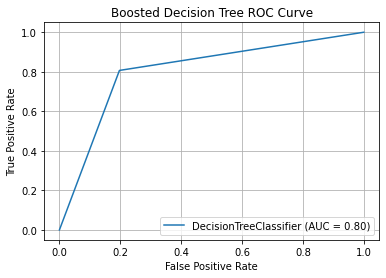

In [48]:
metrics.plot_roc_curve(clf, X_test_clf, y_test_clf)
plt.title("Boosted Decision Tree ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid(True)

### CLF Tuning

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [50]:
parameters = {'criterion':['gini', 'entropy'], 'max_depth':[2, 4, 6, 8, 10, 12]} 

In [51]:
clf_GS = GridSearchCV(clf, parameters)
clf_GS.fit(X_train_clf, y_train_clf)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12]})

In [52]:
grid_clf_GS = clf_GS.best_estimator_
print(grid_clf_GS)

DecisionTreeClassifier(max_depth=6)


### Creating Random Forest Classification

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
SEED = 1

In [55]:
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(undersampled_X_train, undersampled_y_train, test_size=0.3,
                                                   stratify=undersampled_y_train, random_state=SEED)

In [56]:
rf = RandomForestClassifier(random_state=SEED)

In [57]:
rf.fit(X_train_rf, y_train_rf)

RandomForestClassifier(random_state=1)

In [58]:
y_pred_rf = rf.predict(X_test_rf)

In [59]:
y_pred_rf

array([0., 1., 0., ..., 0., 1., 0.])

#### Accuracy

In [60]:
print("RF test accuracy: %0.20f" % rf.score(X_test_rf, y_test_rf))

RF test accuracy: 0.86625153938216570282


#### Random Forest Tuning

In [62]:
from sklearn.model_selection import RandomizedSearchCV

criterion = ['gini', 'entropy']
n_estimators = [5, 10, 50, 100]
max_depth = [5, 10, 50, 100]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'bootstrap': bootstrap,
               'criterion': criterion}

print(random_grid)

In [63]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train_rf, y_train_rf)

In [64]:
rf_random.best_params_

### AdaBoost Classification

In [65]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

In [66]:
SEED = 1

In [67]:
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(undersampled_X_train, undersampled_y_train, test_size=0.3,
                                                   stratify=undersampled_y_train, random_state=SEED)

In [68]:
clf_ada = DecisionTreeClassifier(random_state=SEED)

In [69]:
adb_clf = AdaBoostClassifier(base_estimator=clf_ada)

In [70]:
adb_clf.fit(X_train_a, y_train_a)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=1))

#### Accuracy

In [71]:
adb_clf.score(X_train_a, y_train_a)

1.0

#### AdaBoost Tuning have some problems right now.

## Feature Importance

In [72]:
input_columns_new = ['mbb', 'weight', 'njets', 'nbjets', 'ptbb', 'etabb', 'phibb', 'ebb',
       'dRbb', 'dEtabb', 'dPhibb', 'mj1', 'ptj1', 'etaj1', 'phij1', 'ej1',
       'btagj1', 'qglikelihoodj1', 'mj2', 'ptj2', 'etaj2', 'phij2', 'ej2',
       'btagj2', 'qglikelihoodj2', 'mj3', 'ptj3', 'etaj3', 'phij3', 'ej3',
       'btagj3', 'qglikelihoodj3', 'dR13', 'dEta13', 'dPhi13', 'dR23',
       'dEta23', 'dPhi23', 'mj4', 'ptj4', 'etaj4', 'phij4', 'ej4', 'btagj4',
       'qglikelihoodj4']

X_test = test_df[input_columns_new]

y_test = test_df['label']

In [73]:
class_1, class_0 = train_df.label.value_counts()
c1 = train_df[train_df['label']==1]
c0 = train_df[train_df['label']==0]
c1_sam = c1.sample(class_0)
undersampled_train = pd.concat([c0,c1_sam], axis=0)
undersampled_train['label'].value_counts()

0.0    96088
1.0    96088
Name: label, dtype: int64

In [74]:
feat_importance = clf.tree_.compute_feature_importances(normalize=False)
print("Feature Importance =" + str(feat_importance))

Feature Importance =[0.10925858 0.01785892 0.02129761 0.02291451 0.0219082  0.02069702
 0.02274544 0.18271062 0.02115834 0.05945075]


In [75]:
tree = clf.fit(X_test_clf, y_test_clf)
tree.feature_importances_

array([0.2229935 , 0.03733432, 0.04256035, 0.04006733, 0.04457089,
       0.04322257, 0.0430513 , 0.36849966, 0.04244863, 0.11525144])

In [76]:
feat_imp = pd.DataFrame(tree.feature_importances_, columns=['feature importance'])
feat_imp

,feature importance
0,0.222993
1,0.037334
2,0.042560
3,0.040067
4,0.044571
5,0.043223
6,0.043051
7,0.368500
8,0.042449
9,0.115251


In [77]:
feat_imp['feature']= input_columns
feat_imp

,feature importance,feature
0,0.222993,mbb
1,0.037334,nbjets
2,0.042560,dEtabb
3,0.040067,mj1
4,0.044571,btagj1
5,0.043223,qglikelihoodj1
6,0.043051,mj2
7,0.368500,btagj2
8,0.042449,qglikelihoodj2
9,0.115251,btagj3


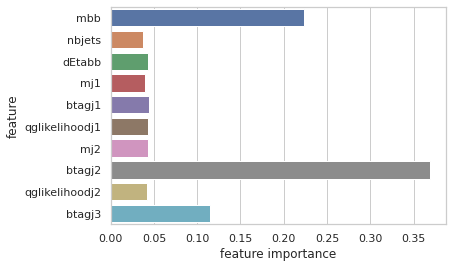

In [78]:
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.barplot(y="feature", x="feature importance", data=feat_imp)

#### ;-; use random forest and its tuned parameters for best results (currently, because the ADABOOST have some flaws and the score might not be accurate)